# Maximiliano Villegas Garcia A01635825

# Activity: work with the iris dataset


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


In [31]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

In [32]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
ds = pd.read_csv(url)

In [33]:
ds

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
# Encoding the categorical column
ds = ds.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
ds

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
# Drop out non necesary columns
ds.drop(['PetalLength', 'PetalWidth'],axis='columns',inplace=True)

#Visualize the dataset
ds

,SepalLength,SepalWidth,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


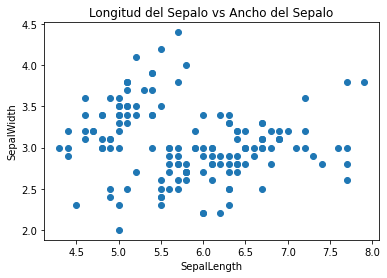

In [36]:
plt.scatter(ds.SepalLength,ds.SepalWidth)
plt.title('Longitud del Sepalo vs Ancho del Sepalo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

<ipython-input-37-b93bea9a26d1>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Setosa')
<ipython-input-37-b93bea9a26d1>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Versicolor')
<ipython-input-37-b93bea9a26d1>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Iris Virginica')


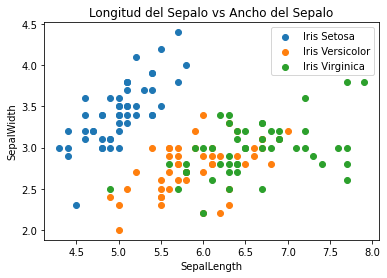

In [37]:
df1 = ds[ds.Class == 0]
df2 = ds[ds.Class == 1]
df3 = ds[ds.Class == 2]


plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Setosa')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Versicolor')
plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Iris Virginica')

plt.title('Longitud del Sepalo vs Ancho del Sepalo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

plt.legend()
plt.show()

In [38]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(ds[['SepalLength','SepalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [39]:
# Add a new column to the dataset with the cluster information
ds['Cluster1'] = yp

ds

,SepalLength,SepalWidth,Class,Cluster1
0,5.1,3.5,0,1
1,4.9,3.0,0,1
2,4.7,3.2,0,1
3,4.6,3.1,0,1
4,5.0,3.6,0,1
...,...,...,...,...
145,6.7,3.0,2,0
146,6.3,2.5,2,2
147,6.5,3.0,2,0
148,6.2,3.4,2,0


In [40]:
ds.Cluster1.unique()

array([1, 0, 2], dtype=int32)

In [41]:
km.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

In [42]:
km.inertia_

37.0507021276596

<ipython-input-43-0bb55b948792>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Setosa')
<ipython-input-43-0bb55b948792>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Versicolor')
<ipython-input-43-0bb55b948792>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Iris Virginica')


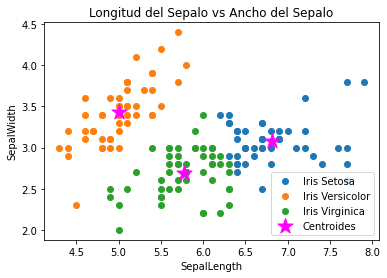

In [43]:
df1 = ds[ds.Cluster1 == 0]
df2 = ds[ds.Cluster1 == 1]
df3 = ds[ds.Cluster1 == 2]

plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Setosa')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Versicolor')
plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Iris Virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Longitud del Sepalo vs Ancho del Sepalo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')


plt.legend()
plt.show()

In [44]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(ds[['SepalLength','SepalWidth']])
    sse.append(km.inertia_)

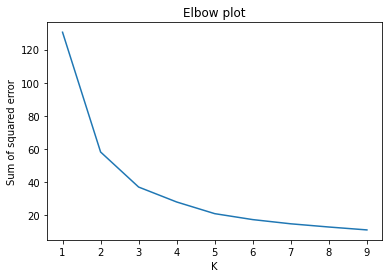

In [45]:
plt.plot(k_rng,sse)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(ds[['SepalLength']])
ds['SepalLength'] = scaler.transform(ds[['SepalLength']])

scaler.fit(ds[['SepalWidth']])
ds['SepalWidth'] = scaler.transform(ds[['SepalWidth']])

ds

,SepalLength,SepalWidth,Class,Cluster1
0,0.222222,0.625000,0,1
1,0.166667,0.416667,0,1
2,0.111111,0.500000,0,1
3,0.083333,0.458333,0,1
4,0.194444,0.666667,0,1
...,...,...,...,...
145,0.666667,0.416667,2,0
146,0.555556,0.208333,2,2
147,0.611111,0.416667,2,0
148,0.527778,0.583333,2,0


In [47]:
ds.describe()

,SepalLength,SepalWidth,Class,Cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,1.000000,1.040000
std,0.230018,0.181611,0.819232,0.818248
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.000000,0.000000
50%,0.416667,0.416667,1.000000,1.000000
75%,0.583333,0.541667,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


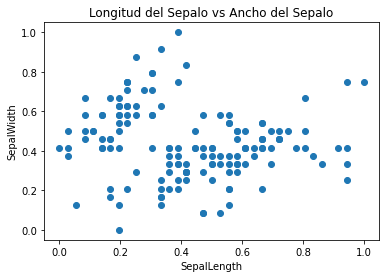

In [48]:
plt.scatter(ds.SepalLength,ds.SepalWidth)
plt.title('Longitud del Sepalo vs Ancho del Sepalo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

In [49]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(ds[['SepalLength','SepalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [50]:
# Add a new column to the dataset with the cluster information
ds['Cluster2'] = yp

ds

,SepalLength,SepalWidth,Class,Cluster1,Cluster2
0,0.222222,0.625000,0,1,0
1,0.166667,0.416667,0,1,0
2,0.111111,0.500000,0,1,0
3,0.083333,0.458333,0,1,0
4,0.194444,0.666667,0,1,0
...,...,...,...,...,...
145,0.666667,0.416667,2,0,2
146,0.555556,0.208333,2,2,1
147,0.611111,0.416667,2,0,2
148,0.527778,0.583333,2,0,2


In [51]:
km.cluster_centers_

array([[0.19897959, 0.60459184],
       [0.40483539, 0.28009259],
       [0.69562648, 0.45390071]])

<ipython-input-52-1fa7a2dc1d20>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Setosa')
<ipython-input-52-1fa7a2dc1d20>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Versicolor')
<ipython-input-52-1fa7a2dc1d20>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Iris Virginica')


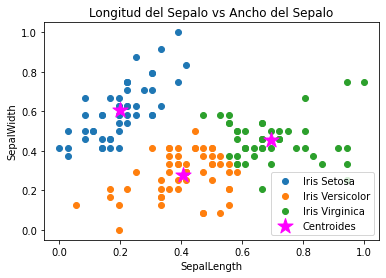

In [52]:
df1 = ds[ds.Cluster2 == 0]
df2 = ds[ds.Cluster2 == 1]
df3 = ds[ds.Cluster2 == 2]

plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Setosa')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Versicolor')
plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Iris Virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Longitud del Sepalo vs Ancho del Sepalo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

plt.legend()
plt.show()